In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras
from matplotlib.colors import ListedColormap
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
cancer = load_breast_cancer()

df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


<Axes: xlabel='mean radius', ylabel='mean texture'>

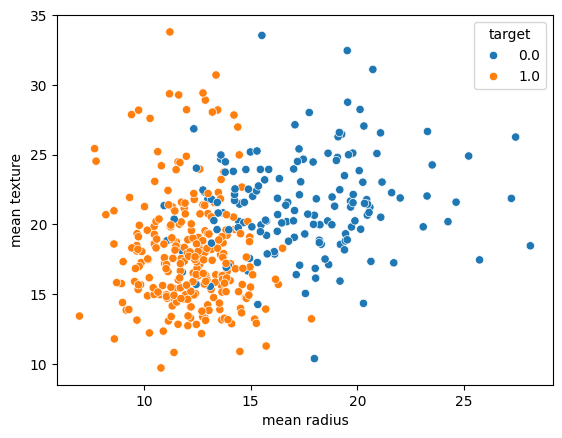

In [42]:
X = df_cancer.iloc[:, [0,1]]
y = df_cancer['target']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

sns.scatterplot(x = X_train['mean radius'], y = X_train['mean texture'], hue = y_train)

In [43]:
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)

scalar = MinMaxScaler()
scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)

<Axes: >

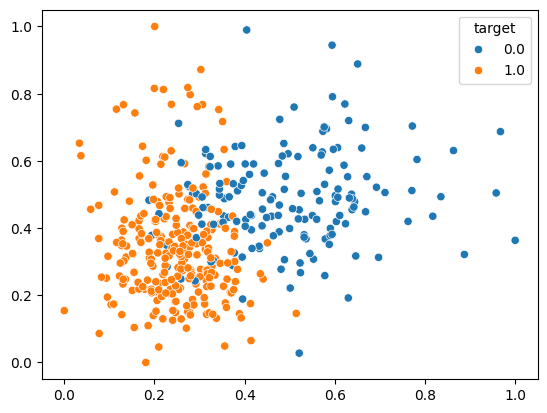

In [44]:
sns.scatterplot(x = X_train_scaled[:,0], y = X_train_scaled[:,1], hue = y_train)

In [45]:
# Define and fit the final model
model = Sequential()
#model.add(Input(shape=(2,)))
model.add(Dense(1, input_dim=2, activation='sigmoid'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam') #, metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)

Epoch 1/500


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 - 1s - 37ms/step - loss: 0.7105
Epoch 2/500
14/14 - 0s - 2ms/step - loss: 0.7105
Epoch 3/500
14/14 - 0s - 2ms/step - loss: 0.7077
Epoch 4/500
14/14 - 0s - 2ms/step - loss: 0.7070
Epoch 5/500
14/14 - 0s - 2ms/step - loss: 0.7052
Epoch 6/500
14/14 - 0s - 2ms/step - loss: 0.7029
Epoch 7/500
14/14 - 0s - 2ms/step - loss: 0.7023
Epoch 8/500
14/14 - 0s - 2ms/step - loss: 0.7016
Epoch 9/500
14/14 - 0s - 2ms/step - loss: 0.7000
Epoch 10/500
14/14 - 0s - 2ms/step - loss: 0.6992
Epoch 11/500
14/14 - 0s - 2ms/step - loss: 0.6979
Epoch 12/500
14/14 - 0s - 2ms/step - loss: 0.6965
Epoch 13/500
14/14 - 0s - 2ms/step - loss: 0.6943
Epoch 14/500
14/14 - 0s - 2ms/step - loss: 0.6948
Epoch 15/500
14/14 - 0s - 2ms/step - loss: 0.6964
Epoch 16/500
14/14 - 0s - 2ms/step - loss: 0.6902
Epoch 17/500
14/14 - 0s - 2ms/step - loss: 0.6923
Epoch 18/500
14/14 - 0s - 2ms/step - loss: 0.6894
Epoch 19/500
14/14 - 0s - 2ms/step - loss: 0.6918
Epoch 20/500
14/14 - 0s - 2ms/step - loss: 0.6871
Epoch 21/500
14/14 -

In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

In [47]:
# Make a prediction
y_predict = model.predict(X_test_scaled)

y_predict_classes = (y_predict > 0.5).astype("int32") # Use this for Binary classification

# Use this for Multi-class classification
# y_predict_classes = np.argmax(y_predict, axis=1) # Try removing argmax and see what happens

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


<Axes: >

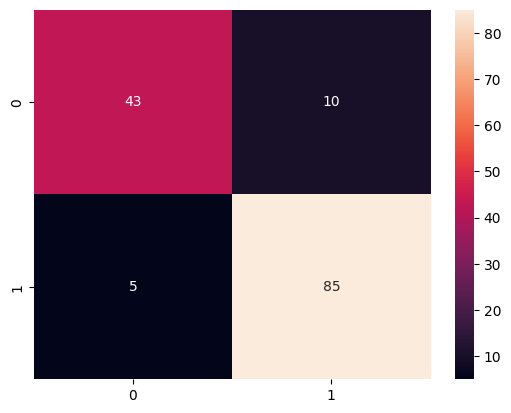

In [48]:
cm =  confusion_matrix(y_test, y_predict_classes)
sns.heatmap(cm, annot=True, fmt='d')

In [49]:
print(classification_report(y_test, y_predict_classes))

              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85        53
         1.0       0.89      0.94      0.92        90

    accuracy                           0.90       143
   macro avg       0.90      0.88      0.89       143
weighted avg       0.90      0.90      0.89       143



2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 519us/step


/var/folders/pr/jvrxp0j524jc4x7gwgx1vwdw0000gn/T/ipykernel_75042/2256470408.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


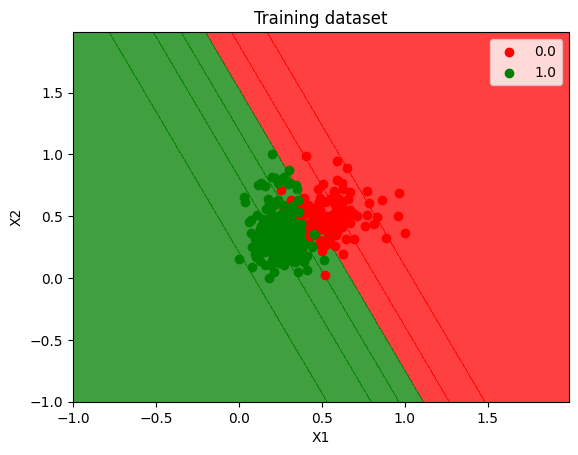

In [50]:
# Visualizing the training set results
X_grid, y_grid = X_train_scaled, y_train

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [51]:
weights, biases = model.layers[0].get_weights()
print(weights)

[[-4.131706 ]
 [-1.8143551]]


In [52]:
print(biases)

[2.5800965]


In [53]:
# Define and fit the final model with more neurons
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu')) # set input_dim to however many feature classes you give the model as inut data
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # set the number of neurons to the number of classes you want to predict, 1 because we are using "simgmoig" (binary) to predict 2 classes but we want only one output
model.compile(loss='binary_crossentropy', optimizer='adam') #, metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
14/14 - 1s - 75ms/step - loss: 0.6867
Epoch 2/500
14/14 - 0s - 2ms/step - loss: 0.6749
Epoch 3/500
14/14 - 0s - 2ms/step - loss: 0.6570
Epoch 4/500
14/14 - 0s - 2ms/step - loss: 0.6310
Epoch 5/500
14/14 - 0s - 2ms/step - loss: 0.5954
Epoch 6/500
14/14 - 0s - 2ms/step - loss: 0.5502
Epoch 7/500
14/14 - 0s - 2ms/step - loss: 0.4931
Epoch 8/500
14/14 - 0s - 2ms/step - loss: 0.4411
Epoch 9/500
14/14 - 0s - 2ms/step - loss: 0.4060
Epoch 10/500
14/14 - 0s - 2ms/step - loss: 0.3758
Epoch 11/500
14/14 - 0s - 2ms/step - loss: 0.3412
Epoch 12/500
14/14 - 0s - 2ms/step - loss: 0.3023
Epoch 13/500
14/14 - 0s - 2ms/step - loss: 0.2973
Epoch 14/500
14/14 - 0s - 2ms/step - loss: 0.2881
Epoch 15/500
14/14 - 0s - 2ms/step - loss: 0.2705
Epoch 16/500
14/14 - 0s - 2ms/step - loss: 0.2715
Epoch 17/500
14/14 - 0s - 2ms/step - loss: 0.2617
Epoch 18/500
14/14 - 0s - 2ms/step - loss: 0.2543
Epoch 19/500
14/14 - 0s - 2ms/step - loss: 0.2638
Epoch 20/500
14/14 - 0s - 2ms/step - loss: 0.2538
Epoch 21

In [54]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,025 (15.73 KB)

 Trainable params: 1,341 (5.24 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,684 (10.49 KB)

In [55]:
# Make a prediction
y_predict = model.predict(X_test_scaled)

y_predict_classes = (y_predict > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


<Axes: >

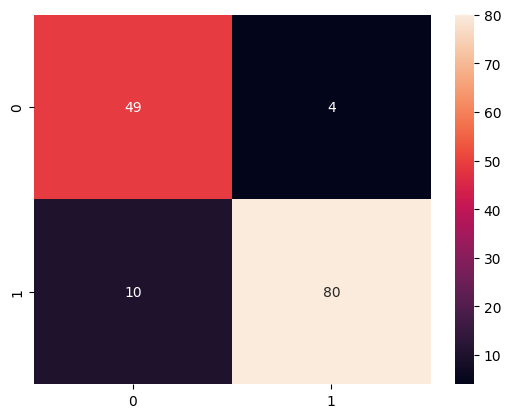

In [56]:
cm =  confusion_matrix(y_test, y_predict_classes)
sns.heatmap(cm, annot=True, fmt='d')

In [57]:
print(classification_report(y_test, y_predict_classes))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.88        53
         1.0       0.95      0.89      0.92        90

    accuracy                           0.90       143
   macro avg       0.89      0.91      0.90       143
weighted avg       0.91      0.90      0.90       143



2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 576us/step


/var/folders/pr/jvrxp0j524jc4x7gwgx1vwdw0000gn/T/ipykernel_75042/2256470408.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


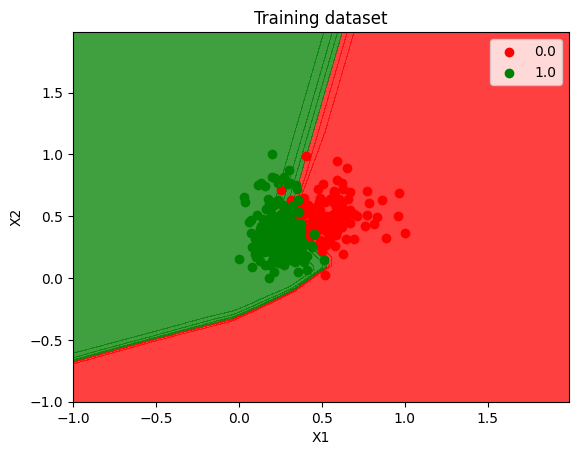

In [58]:
# Visualizing the training set results
X_grid, y_grid = X_train_scaled, y_train

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [59]:
weights, biases = model.layers[0].get_weights()
print(weights)

[[ 0.51123804 -0.2477172  -0.14944878 -0.36894315  0.22443558  0.4336351
  -0.00304998  0.28972766 -0.46267623 -0.49800104  0.43469384 -0.02071708
   0.02240278 -0.2443111   0.6353433  -0.13422373 -0.29355234  0.29930484
  -0.21593925 -0.3366539 ]
 [ 0.19118677 -0.10417083 -0.43180954 -0.0952884  -0.7086394   0.30664065
  -0.2799552   0.13756193  0.54855686  0.01934016  0.24044539 -0.4234133
   0.59844327 -0.02013153 -0.11471587  0.17644714 -0.47587487  0.12775321
  -0.22191846  0.52754986]]


In [60]:
print(biases)

[-0.09917959  0.          0.          0.         -0.05532464 -0.03393188
 -0.00521105 -0.08533069 -0.1120266  -0.00777557 -0.01647248  0.
 -0.05292385  0.         -0.01068978  0.14346126  0.         -0.08152965
  0.          0.09689528]
